<a href="https://colab.research.google.com/github/vicjhdezaes/GPS_Proyecto/blob/master/k_Means_CAP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from google.colab import files


In [38]:
import time

In [39]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [40]:

uploaded = files.upload()
dataframe = pd.read_csv("analisis.csv")
dataframe.head()

Saving analisis.csv to analisis (1).csv


,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [41]:
dataframe.describe()

print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


<ipython-input-42-20defdcd68fe>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


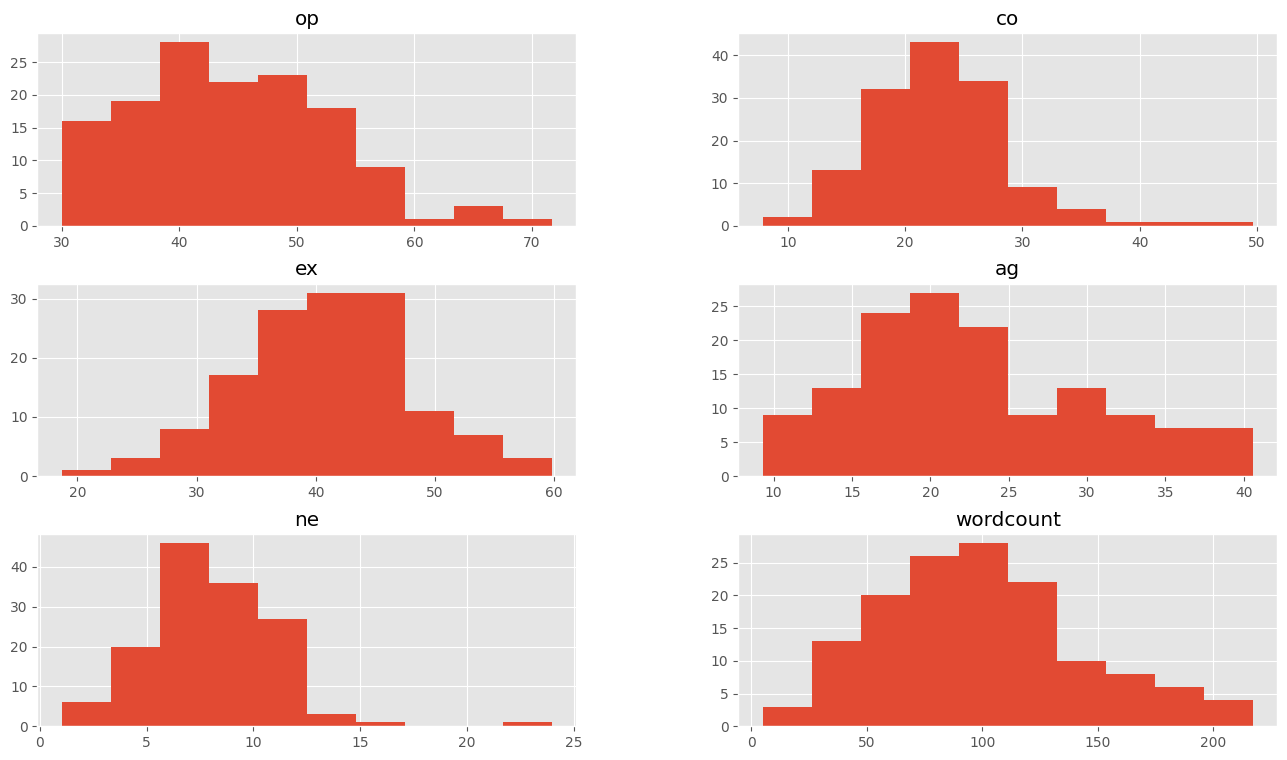

In [42]:
dataframe.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


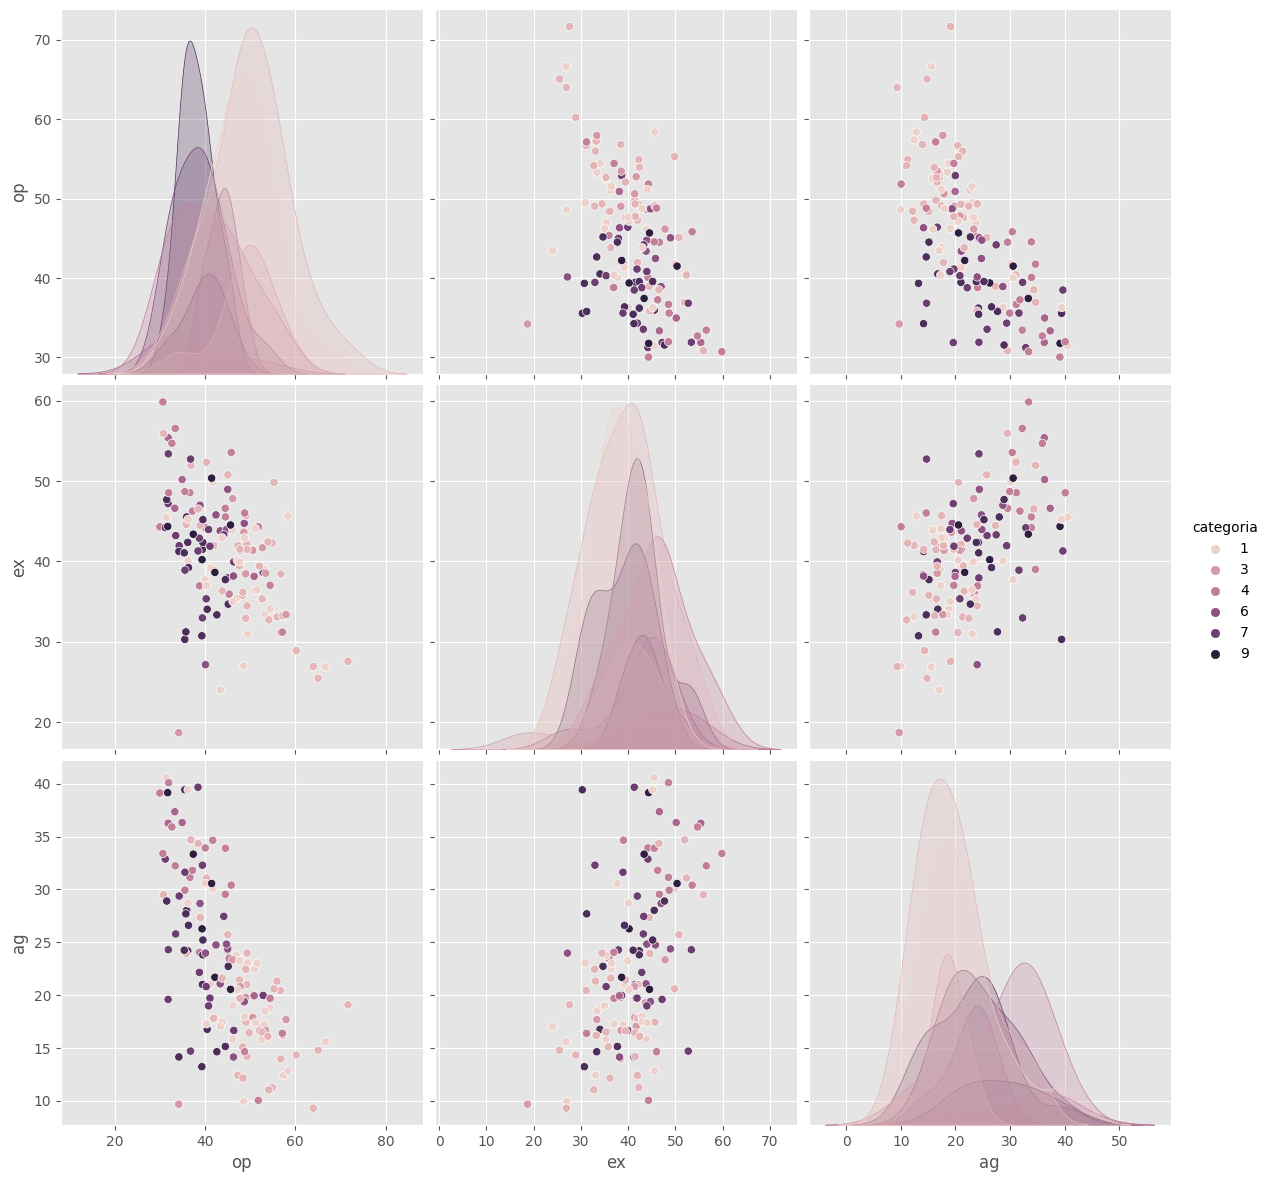

In [43]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

In [44]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [45]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

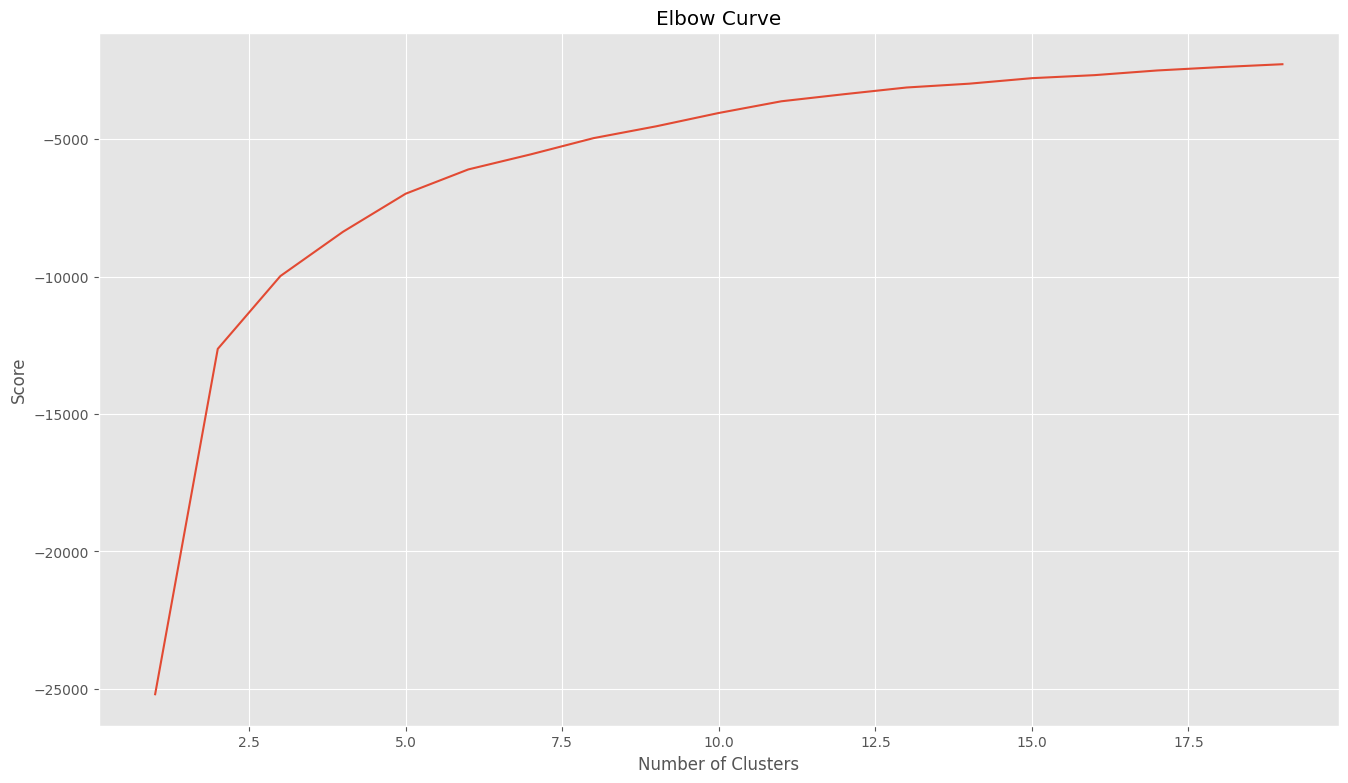

In [46]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [79]:
# Medición de tiempo de ejecución
start_time = time.time()

In [80]:
kmeans = KMeans(n_clusters=5).fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
elapsed_time = time.time() - start_time
print("Tiempo de ejecución del algoritmo completo:", elapsed_time, "segundos")

Tiempo de ejecución del algoritmo completo: 3.0747547149658203 segundos


In [82]:
start_time = time.time()

In [83]:

centroids = kmeans.cluster_centers_
print(centroids)

[[35.90241306 47.56828232 33.58748762]
 [49.99285115 40.87133549 17.47411785]
 [58.58657531 31.02839375 15.6120435 ]
 [42.75925435 32.7509888  21.08881555]
 [39.83046524 43.5344649  23.40039634]]


In [84]:
elapsed_time = time.time() - start_time
print("Tiempo de ejecución de la actualización de centros:", elapsed_time, "segundos")

Tiempo de ejecución de la actualización de centros: 3.0180437564849854 segundos


In [85]:
start_time = time.time()

In [86]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [87]:
elapsed_time = time.time() - start_time
print("Tiempo de ejecución de la predicción de clústeres:", elapsed_time, "segundos")

Tiempo de ejecución de la predicción de clústeres: 2.7226383686065674 segundos


In [88]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

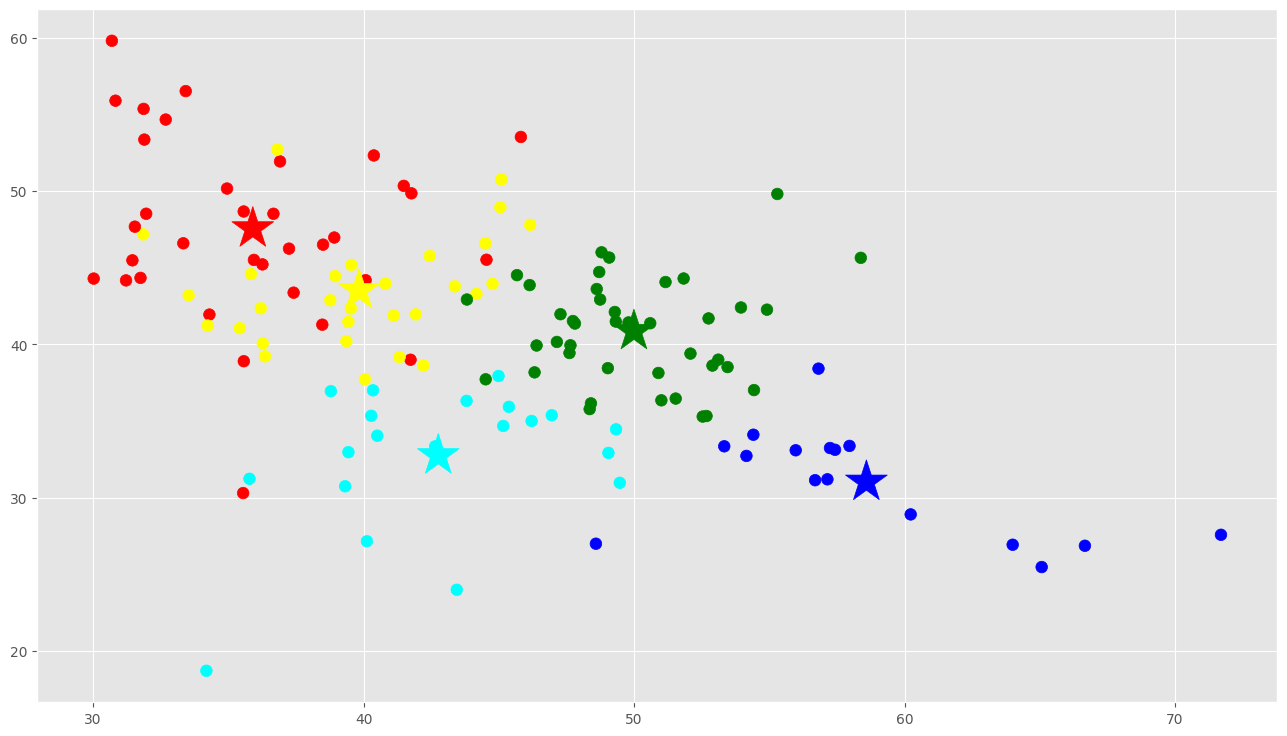

In [89]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

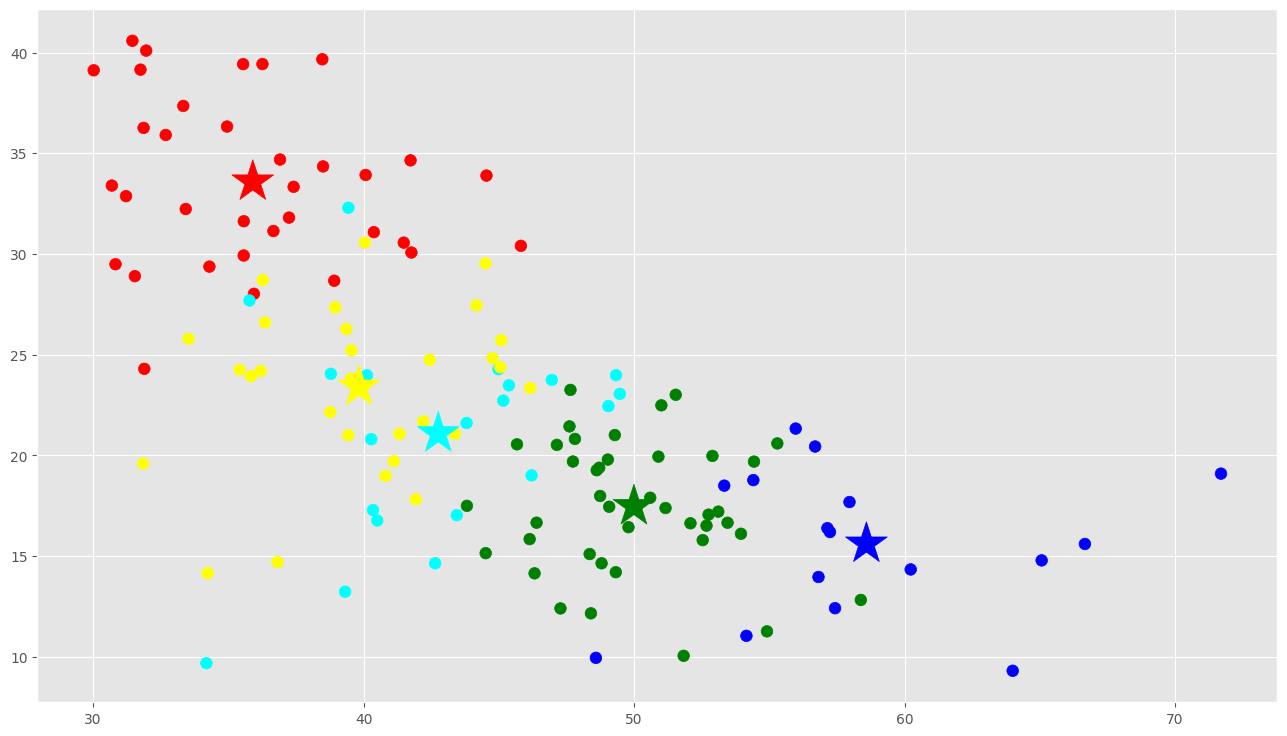

In [90]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

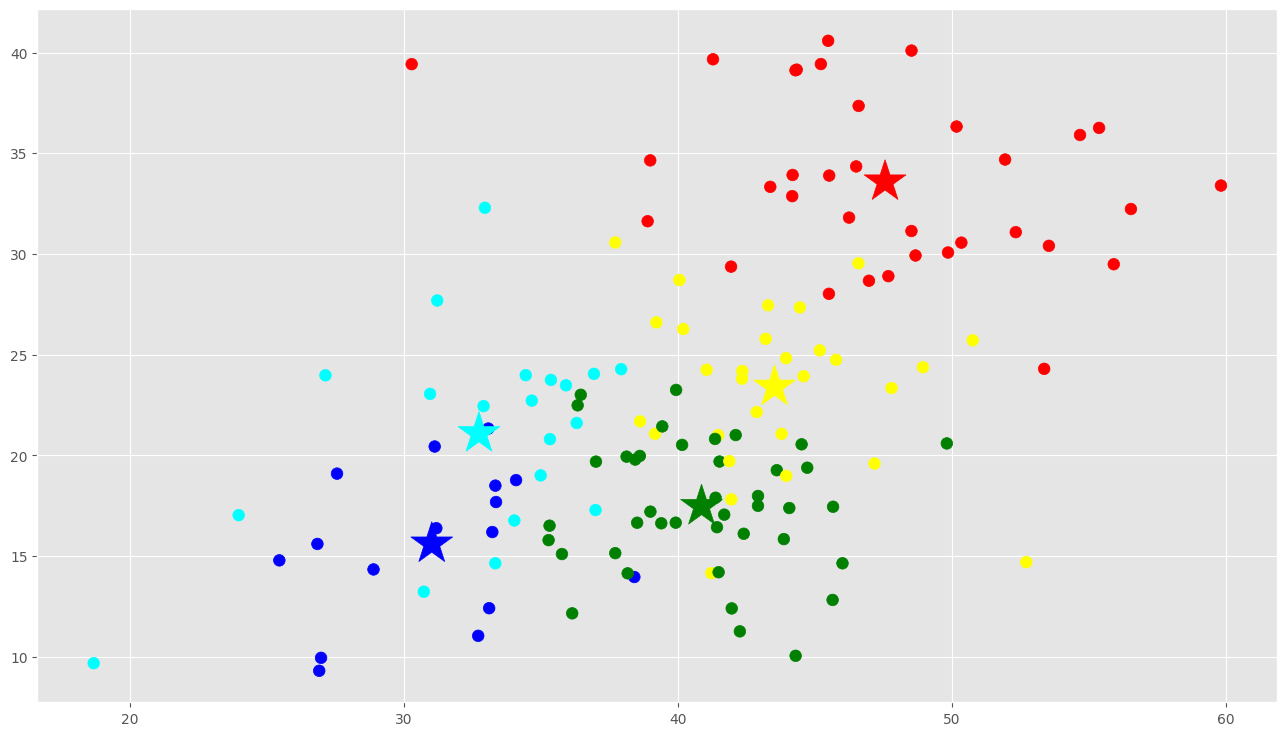

In [91]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [92]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,34
1,green,41
2,blue,16
3,cyan,20
4,yellow,29


In [93]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,3.0
9,9,3.0


In [94]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 98,  21,  82, 120,  64])

In [95]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])


maria_patino
carmenelectra
JudgeJudy
SarahPalinUSA
ierrejon


In [96]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]


PARALELIZACION MPI INCLUYENDO TIEMPO DE EJECUCIÓN 

In [97]:
!pip install mpi4py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


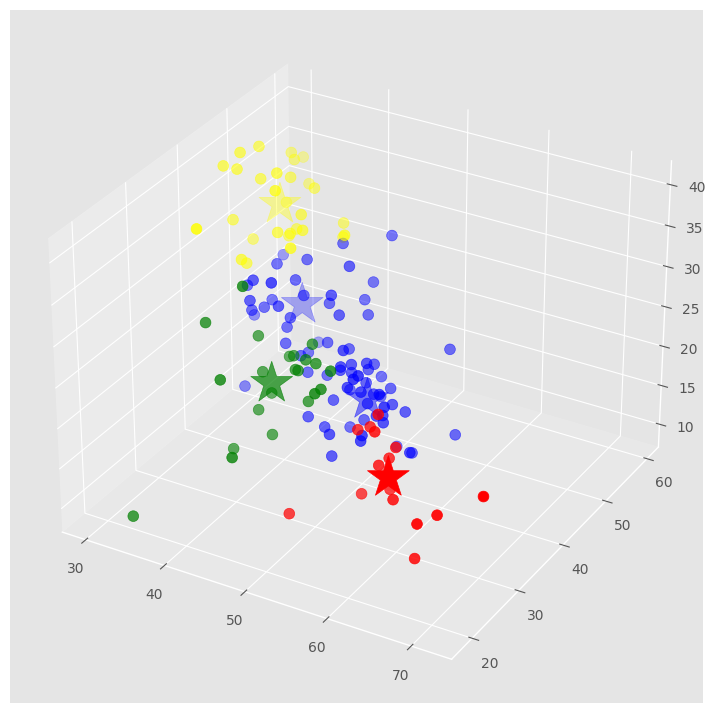

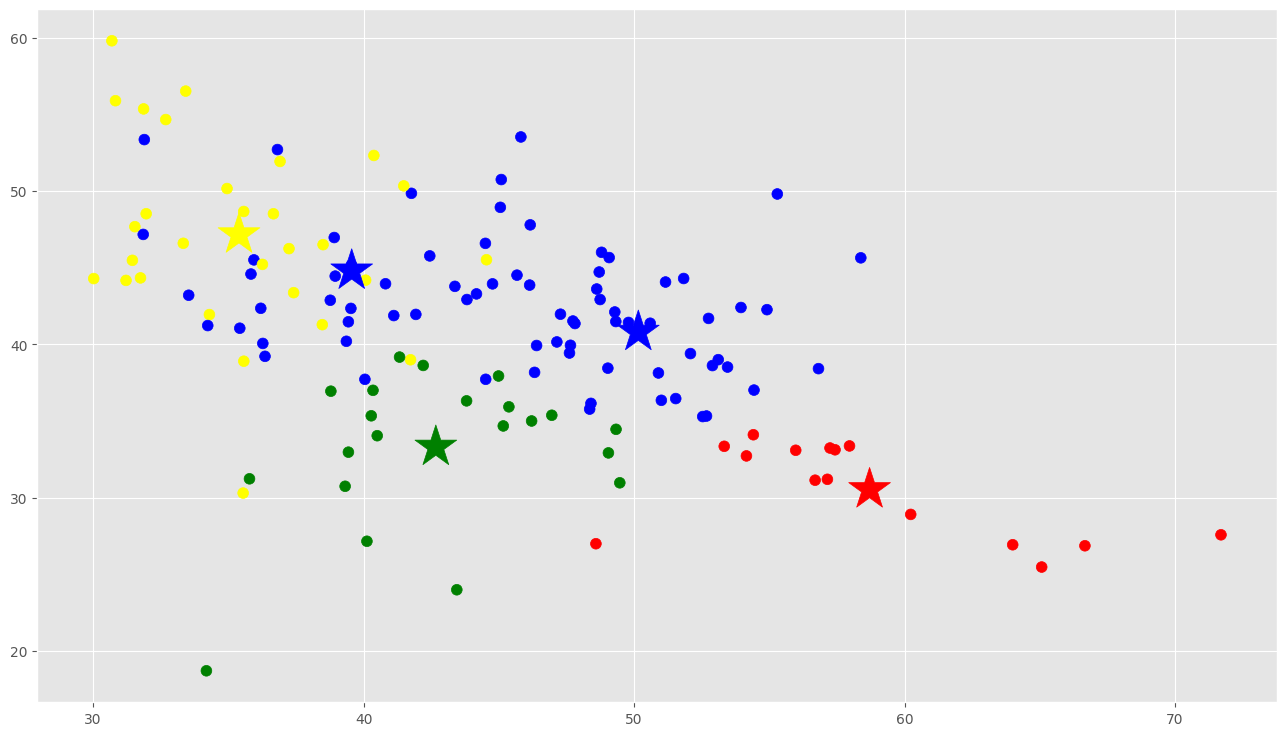

Tiempo de ejecución del cálculo de los centroides y etiquetas para la parte del proceso 0: 0.025261878967285156 segundos
Tiempo de ejecución del cálculo de los centroides finales y etiquetas para todo el conjunto de datos: 0.003224611282348633 segundos


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from time import time

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Leemos el archivo CSV
dataframe = pd.read_csv(r"analisis.csv")

# Obtenemos los datos de op, ex y ag de cada usuario
X = np.array(dataframe[["op","ex","ag"]])

# Definimos el número de clusters que queremos encontrar
n_clusters = 5

# Dividimos el conjunto de datos en partes iguales para cada proceso
chunk_size = len(X) // size
chunk_start = rank * chunk_size
chunk_end = chunk_start + chunk_size
X_chunk = X[chunk_start:chunk_end]

# Creamos un objeto KMeans para cada proceso y calculamos los centroides y etiquetas para su parte de los datos
t1 = time()
kmeans = KMeans(n_clusters=n_clusters).fit(X_chunk)
centroids_chunk = kmeans.cluster_centers_
labels_chunk = kmeans.predict(X_chunk)
t2 = time()

# Recopilamos todos los centroides y etiquetas de todos los procesos
centroids_all = comm.gather(centroids_chunk, root=0)
labels_all = comm.gather(labels_chunk, root=0)

if rank == 0:
    # Combinamos los centroides y etiquetas de todos los procesos
    centroids = np.concatenate(centroids_all, axis=0)
    labels = np.concatenate(labels_all, axis=0)

    # Calculamos los centroides finales y las etiquetas para todo el conjunto de datos
    t3 = time()
    kmeans_final = KMeans(n_clusters=n_clusters, init=centroids).fit(X)
    centroids_final = kmeans_final.cluster_centers_
    labels_final = kmeans_final.predict(X)
    t4 = time()

    # Mostramos los resultados
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colores=['blue','red','green','blue','yellow']
    asignar=[]
    for row in labels_final:
        asignar.append(colores[row])
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
    ax.scatter(centroids_final[:, 0], centroids_final[:, 1], centroids_final[:, 2], marker='*', c=colores, s=1000)
    plt.show()

    # Mostramos los resultados en 2D
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
    ax.scatter(centroids_final[:, 0], centroids_final[:, 1], marker='*', c=colores, s=1000)
    plt.show()

    # Mostramos los tiempos de ejecución
    print(f"Tiempo de ejecución del cálculo de los centroides y etiquetas para la parte del proceso {rank}: {t2-t1} segundos")
    print(f"Tiempo de ejecución del cálculo de los centroides finales y etiquetas para todo el conjunto de datos: {t4-t3} segundos")

